This notebook examines the basic stats and shape of the data.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
np.random.seed(23)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# the variable 'now' references the datetime that the data was saved. 
# Other notebooks call it to reference the most recent version of the cleaned data.
now = '2020-07-07-09-58'
%store now

Stored 'now' (str)


In [4]:
# this is only needed if the genre_data_loader.py script is not in the directory of the nb or script from which you call it
import importlib.util
spec = importlib.util.spec_from_file_location("genre_data_loader", "/Users/Daniel/Code/Genre/src/genre_scripts/genre_data_loader.py")
genre_data_loader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(genre_data_loader)
# if the genre_data_loader.py script is in the directory in which you are calling it, only the next line is needed:
LoadGenreData = genre_data_loader.LoadGenreData

In [5]:
# get currrent date for latest version of data set
# %store -r now # not needed in this nb where 'now' is defined

X_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now)
y_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now)
X_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now)
y_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now)

In [6]:
# call data loader script
genre_data = LoadGenreData(now, X_path_train = X_path_train, y_path_train = y_path_train, 
                                             X_path_test = X_path_test, y_path_test = y_path_test)
# get currrent date for latest version of data set
# %store -r now # not needed in this nb where 'now' is defined

X_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now)
y_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now)
X_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now)
y_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now)
data = genre_data.data
genre_list = genre_data.get_list_of_genres()

In [7]:
print('There are {} artists with genre and binary-gender labels.'.format(data.shape[0]))
print('There are {} unique genre labels.'.format(len(genre_list)))
print('Previously there were 1669 unique genre lables.')

There are 15470 artists with genre and binary-gender labels.
There are 1491 unique genre labels.
Previously there were 1669 unique genre lables.


In [8]:
data_male = data[data.gender == 'male']
data_female = data[data.gender == 'female']

In [9]:
tot = data.shape[0]
m = data_male.shape[0]
f = data_female.shape[0]
print('{} total artists'.format(tot))
print('{} female artists, or {:0.0f}%'.format(f, 100*f/(f+m)))
print('{} male artists, or {:0.0f}%'.format(m, 100*m/(f+m)))

15470 total artists
4855 female artists, or 31%
10615 male artists, or 69%


### Count the min, mean, max of number of genres:

In [10]:
n = data.shape[0]
a,b,c = data.genrelist_length.mean(), data.genrelist_length.std(), data.genrelist_length.max()
print('Total:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Total:
15470 Artists.
Mean number of genre labels: 2.71.
STD of the number of genre labels: 1.8.
Max number of genre labels: 73.


### Count the min, mean, max of number of genres for male and female artists:

In [11]:
data_female = data[data.gender == 'female']
n = data_female.shape[0]
a,b,c = data_female.genrelist_length.mean(), data_female.genrelist_length.std(), data_female.genrelist_length.max()
print('Female:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Female:
4855 Artists.
Mean number of genre labels: 2.63.
STD of the number of genre labels: 1.53.
Max number of genre labels: 11.


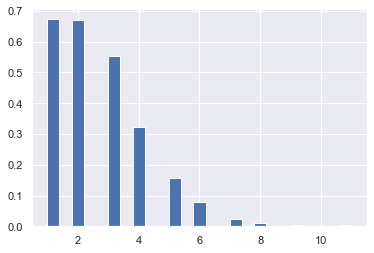

In [10]:
plt.hist(data_female.genrelist_length, bins = 25, density = True)
plt.show()

In [11]:
data_male = data[data.gender == 'male']
m = data_male.shape[0]
a,b,c = data_male.genrelist_length.mean(), data_male.genrelist_length.std(), data_male.genrelist_length.max()
print('Male:')
print(f'{m} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Male:
10615 Artists.
Mean number of genre labels: 2.74.
STD of the number of genre labels: 1.92.
Max number of genre labels: 73.


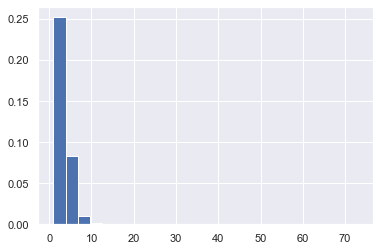

In [12]:
plt.hist(data_male.genrelist_length, bins = 25, density = True)
plt.show()

Set variables:

In [13]:
max_num_male = 73
max_num_female = 11
max_num = max(max_num_female, max_num_male)

### The histograms for genre labels. 

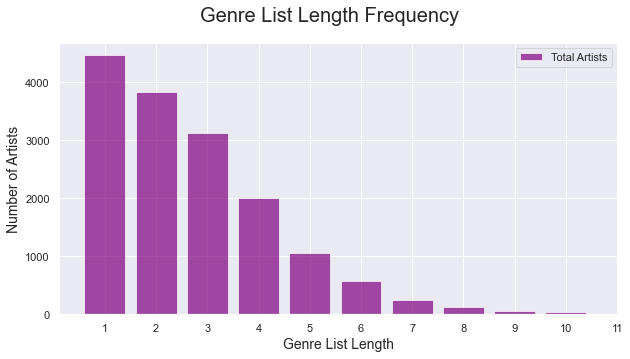

In [14]:
plt.figure(figsize = (10, 5))
plt.hist(data.genrelist_length, bins = range(1,12), align = 'left', rwidth = .8, density = False, color = 'purple', alpha = .7, label = 'Total Artists')
plt.legend()
plt.xticks(range(1,12))
plt.xlabel("Genre List Length", fontsize=14)
plt.ylabel("Number of Artists", fontsize=14)
plt.suptitle("Genre List Length Frequency", fontsize = 20)
# plt.show()
plt.savefig("genre_list_length_frequency")

### The histograms for genre labels for male and female artists. 

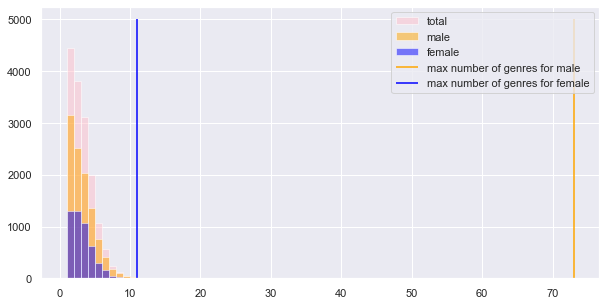

In [15]:
plt.figure(figsize = (10, 5))
plt.hist(data.genrelist_length, bins = range(1,max_num), density = False, color = 'pink', alpha = .5, label = 'total')
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = False, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 5000, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 5000, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = False, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities: the heights are scaled so as the sum of all heights is 1.

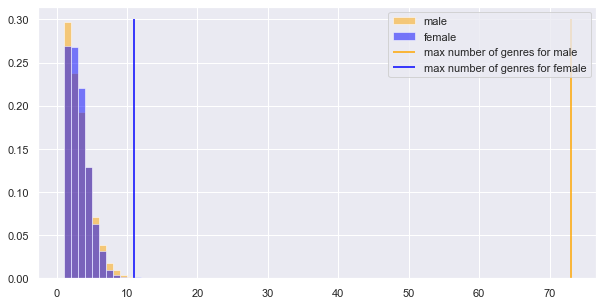

In [16]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = True, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = .3, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = .3, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = True, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities; three bins: $[1, mean)$, $[mean,2 \cdot mean)$, $[2 \cdot mean,max]$

In [17]:
# plt.figure(figsize = (10, 5))
# plt.hist(data_male.genrelist_length, bins = [0,data_male.genrelist_length.mean(),2*data_male.genrelist_length.mean(),max_num], density = False, color = 'orange', alpha = .5, label = 'male')
# plt.hist(data_female.genrelist_length, bins = [0,data_female.genrelist_length.mean(),2*data_female.genrelist_length.mean(),max_num], density = False, color = 'blue', alpha = .5, label = 'female')
# plt.legend()
# plt.show()

## What are the most common genre labels? 



### Count the number of times that a label occurs:

### Take a look at the most frequent genres:

In [18]:
# import a UDF to create a DataFrame with the frequencies of genres
spec = importlib.util.spec_from_file_location("genre_frequency_by_gender", "/Users/Daniel/Code/Genre/src/genre_scripts/genre_frequency_by_gender.py")
genre_frequency_by_gender = importlib.util.module_from_spec(spec)
spec.loader.exec_module(genre_frequency_by_gender)
frequency_by_gender = genre_frequency_by_gender.frequency_by_gender
# from src.genre_scripts.genre_frequency_by_gender import frequency_by_gender

In [19]:
genre_frequencies = frequency_by_gender(genre_data.get_sparse_X_vector(), data, genre_data.get_dict_id_to_genre())
# sort by frequences descending
genre_frequencies.sort_values(['frequency'], ascending = False, inplace = True)
genre_frequencies.set_index('genre', inplace = True)

In [20]:
genre_frequencies.head(20)

,frequency,female,male
genre,,,
pop,3279,1669,1610
rock,2208,461,1747
country,2026,634,1392
r_and_b,1926,940,986
hip_hop,1395,248,1147
soul,1304,676,628
folk,1283,530,753
jazz,1173,489,684
alternative_rock,1151,242,909


Extract longest list:

In [41]:
data = genre_data.as_lists()

In [36]:
data.sort_values('genrelist_length', ascending = False).head()

,genrelist_length,gender,genre_string,genre_list
artist,,,,
Adrian_Baker,73,male,blue_eyed_soul video_game acoustic_rock breakb...,"[blue_eyed_soul, video_game, acoustic_rock, br..."
Juan_d'Anyelica,45,male,european_free_jazz cape_jazz stride afrobeat s...,"[european_free_jazz, cape_jazz, stride, afrobe..."
Amir_Derakh,15,male,dark_pop post_punk industrial noise glam_metal...,"[dark_pop, post_punk, industrial, noise, glam_..."
Tom_Bailey,15,male,post_punk house dance_pop world_beat indian du...,"[post_punk, house, dance_pop, world_beat, indi..."
James_Plotkin,15,male,industrial_hip_hop cybergrind sludge_metal ele...,"[industrial_hip_hop, cybergrind, sludge_metal,..."


In [37]:
longest_list = data.loc["Adrian_Baker"].genre_list

In [38]:
longest_list

['blue_eyed_soul',
 'video_game',
 'acoustic_rock',
 'breakbeat',
 'teen_pop',
 'hip_hop',
 'disco',
 'pop',
 'indie_rock',
 'classical',
 'bedroom_pop',
 'britpop',
 'nursery_rhymes',
 'comedy_rock',
 'art_pop',
 'world_fusion',
 'bubblegum_pop',
 'library',
 'surf_rock',
 'experimental',
 'football_chant',
 'elevator',
 'tribute',
 'chamber_pop',
 'lo_fi',
 'orchestral_pop',
 'ambient',
 'anthem_trance',
 'doo_wop',
 'electronic_rock',
 'twee_pop',
 'soundtrack',
 'new_age',
 'dance',
 'glam_rock',
 'easy_listening',
 'harmony_pop',
 'christmas',
 'down_tempo',
 'karaoke',
 'new_wave',
 'arena_rock',
 'nightcore',
 'middle_of_the_road',
 'baroque_pop',
 'musique_concrete',
 'jingles',
 'casiocore',
 'acapella',
 'indie_pop',
 'spoken_word',
 'nostalgia',
 'psychedelic_pop',
 'sunshine_pop',
 'big_band',
 'jangle_pop',
 'lounge',
 'progressive_rock',
 'funk',
 'instrumental_synth',
 'reggae',
 'hard_rock',
 'oriented_rock',
 'progressive_pop',
 'art_rock',
 'europop',
 'synth_pop',
 '

In [40]:
data[data['gender'] == 'female'].sort_values('genrelist_length', ascending = False)

,genrelist_length,gender,genre_string,genre_list
artist,,,,
Apollonia_Kotero,11,female,house dance funk disco pop contemporary_r_and_...,"[house, dance, funk, disco, pop, contemporary_..."
Jocelyn_Brown,11,female,house new_jack_swing acid_jazz dance disco pop...,"[house, new_jack_swing, acid_jazz, dance, disc..."
Phoebe_Snow,11,female,rock_and_roll jazz jazz_blues pop blues gospel...,"[rock_and_roll, jazz, jazz_blues, pop, blues, ..."
Yisel,11,female,world indie_pop fusion j_synth world_beat elec...,"[world, indie_pop, fusion, j_synth, world_beat..."
Annie_Lennox,11,female,blue_eyed_soul contemporary jazz pop pop_rock ...,"[blue_eyed_soul, contemporary, jazz, pop, pop_..."
...,...,...,...,...
La_Costa,1,female,country,[country]
Elsie_Carlisle,1,female,british_dance_band,[british_dance_band]
Audi_Y_Zentimiento,1,female,tejano,[tejano]


In [41]:
data.loc['Annie_Lennox'].genre_list

['blue_eyed_soul',
 'contemporary',
 'jazz',
 'pop',
 'pop_rock',
 'electronica',
 'new_wave',
 'synth_pop',
 'soul',
 'rock',
 'r_and_b']

In [39]:
i = np.random.randint(len(genre_list))
i, genre_list[i]

(577, 'garba')

In [60]:
twodata = data[data['genrelist_length'] == 2]
twodata['genre_list']
# twodata[twodata['genre_list'] == ['r_and_b', 'soul']]

artist
Sherrick                           [r_and_b, soul]
Asher_Roth          [hip_hop, alternative_hip_hop]
Jean-Louis_Murat              [new_wave, pop_rock]
Frankie_DeCarlos                   [r_and_b, soul]
Gwen_Sebastian                     [rock, country]
                                 ...              
David_Skinner               [psychedelic_pop, pop]
Grant_McLennan            [alternative_rock, rock]
Syleena_Johnson                    [r_and_b, soul]
Skylar_Laine               [country_rock, country]
Nikki_Yanofsky                         [jazz, pop]
Name: genre_list, Length: 3820, dtype: object

In [73]:
mask = data.apply(lambda x: x.genre_list == ['r_and_b', 'soul'], axis = 1)
randbandsoul = data[mask]
excerpt = randbandsoul.iloc[2:5]
excerpt[['genre_list', 'gender']]

,genre_list,gender
artist,,
Otis_Redding,"[r_and_b, soul]",male
Donell_Jones,"[r_and_b, soul]",male
Blinky,"[r_and_b, soul]",female
